Projet: Analyse Exploratoire des Données (Exploratory Data Analysis)

Realise par : ISSAME IMAD & AGOUMI MOHAMMED AMINE 3IIR G4

Encadre par : Hamza ES-SAMAALI

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


path_to_your_file = '/content/drive/My Drive/AD_ProjectDatasets/amazon.csv'
data = pd.read_csv(path_to_your_file)

#test
print(data.head())


Mounted at /content/drive
  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  

**Étape facultatif ** : Nettoyage des données
Il est crucial de nettoyer les données avant toute analyse pour éviter des erreurs dues à des valeurs manquantes ou mal formatées.

In [ ]:
#print(data.isnull().sum())
#data = data.dropna()
# ca pour le remplacement des valeurs
# data.fillna('Valeur par défaut', inplace=True)


Question 1: Top 5 des meilleures catégories
Supposons que le dataset contient une colonne category et une colonne rating.




In [54]:
import seaborn as sns
import matplotlib.pyplot as plt



categories = data['listed_in'].str.split(', ').explode()
top_categories = categories.value_counts().head(5)


print(top_categories)


listed_in
Drama       3605
Comedy      2036
Action      1605
Suspense    1483
Horror       838
Name: count, dtype: int64


(Qst Bonus) Representation graphique des Top 5 des meilleures catégories
Supposons que le dataset contient une colonne category et une colonne rating

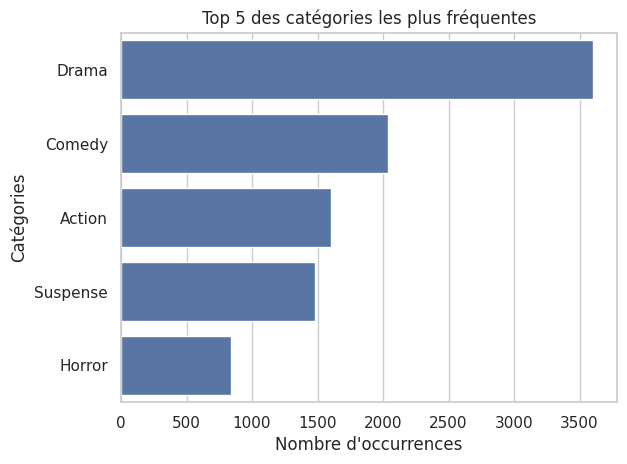

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt



categories = data['listed_in'].str.split(', ').explode()
top_categories = categories.value_counts().head(5)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 des catégories les plus fréquentes')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Catégories')
plt.show()

Question 2: Top 5 des réalisateurs
Supposons une colonne director.

In [57]:
# pour la suppression des lignes avec des données manquantes dans la colonne 'director'
#data = data.dropna(subset=['director'])
top_directors = data['director'].value_counts().head(5)
print(top_directors)

director
Mark Knight        43
Jay Chapman        34
Manny Rodriguez    22
John English       20
Cannis Holder      19
Name: count, dtype: int64


(Question bonus) Representation graphique des Top 5 des réalisateurs
Supposons une colonne director

<ipython-input-56-0e498c930268>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
<ipython-input-56-0e498c930268>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


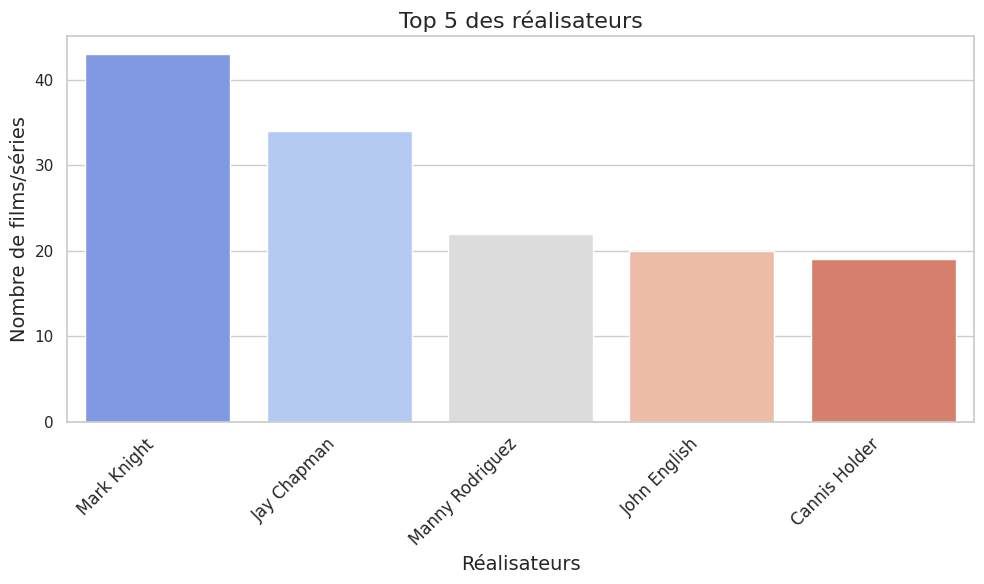

In [56]:
top_directors = data['director'].value_counts().head(5)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')


plt.title('Top 5 des réalisateurs', fontsize=16)
plt.xlabel('Réalisateurs', fontsize=14)
plt.ylabel('Nombre de films/séries', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

plt.tight_layout()
plt.show()

QST 3 : Les dix meilleurs acteurs

nous avons fait ca car au cour de l'affichage j'ai un acteur nomme "1" nous avons opte pour l'eliminer tout d'abord

In [22]:
data_actor = data[data['cast']!='1']

In [62]:
#data = data.dropna(subset=['cast']) ca c'est juste pour le nettoyage des donnees de la colonne cast
data['actors'] =data_actor['cast'].str.split(',')
data_exploded = data.explode('actors')

top_actors = data_exploded['actors'].value_counts().head(10)
print(top_actors)


actors
Maggie Binkley        56
Gene Autry            32
 Nassar               30
 Champion             29
Anne-Marie Newland    25
 Prakash Raj          23
Roy Rogers            23
Cassandra Peterson    22
John Wayne            21
 Michael Madsen       18
Name: count, dtype: int64


(QST Bonus) Representation graphique des dix meilleurs acteurs

<ipython-input-63-8dfec8549f81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='muted')


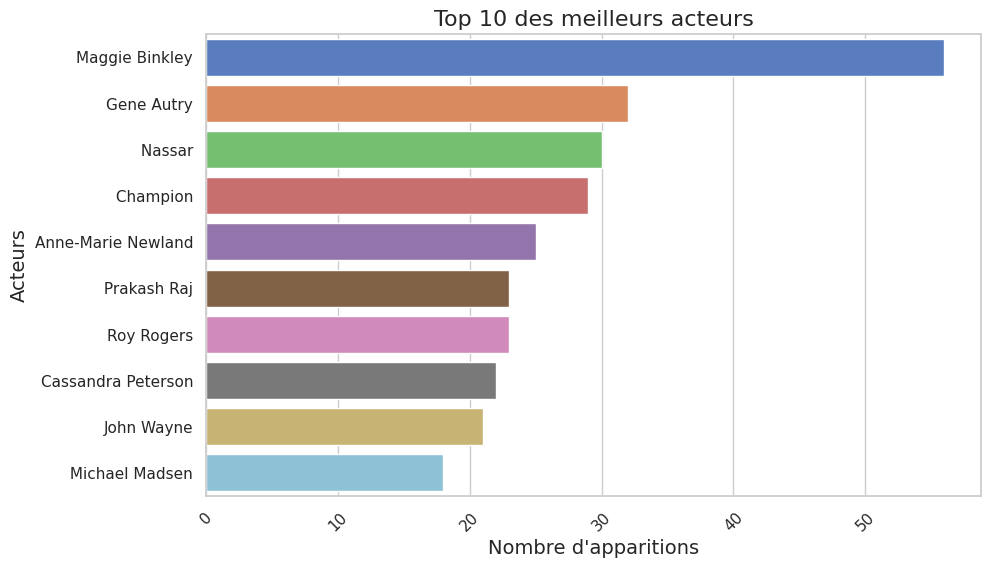

In [63]:
data['actors'] =data_actor['cast'].str.split(',')
data_exploded = data.explode('actors')

top_actors = data_exploded['actors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='muted')
plt.title('Top 10 des meilleurs acteurs', fontsize=16)
plt.xlabel('Nombre d\'apparitions', fontsize=14)
plt.ylabel('Acteurs', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Question 4: Les cinq meilleures séries télévisées avec le plus grand nombre de saisons
Supposons les colonnes title et seasons.

In [64]:
# Suppression des lignes avec des données manquantes dans la colonne 'duration'
#data = data.dropna(subset=['duration'])

tv_shows = data[data['type'] == 'TV Show']

tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)

top_tv_shows = tv_shows.sort_values(by='num_seasons', ascending=False).head(5)
print(top_tv_shows )


     show_id     type                     title director  \
770     s771  TV Show          The Amazing Race      NaN   
1007   s1008  TV Show            Silent Witness      NaN   
840     s841  TV Show                  Survivor      NaN   
8071   s8072  TV Show             Top Gear (UK)      NaN   
3291   s3292  TV Show  America's Next Top Model      NaN   

                                             cast country         date_added  \
770                                  Phil Keoghan     NaN                NaN   
1007     Emilia Fox, Richard Lintern, David Caves     NaN                NaN   
840                                   Jeff Probst     NaN                NaN   
8071        Matt Leblanc, Chris Harris, Rory Reid     NaN  September 2, 2021   
3291  Tyra Banks, Nigel Barker, André Leon Talley     NaN                NaN   

      release_year rating    duration                              listed_in  \
770           2017  TV-PG  29 Seasons                               TV Shows  

<ipython-input-64-e200ae1de704>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)


(Question Bonus) Representation graphique des cinq meilleures séries télévisées avec le plus grand nombre de saisons

<ipython-input-65-59f700cc2ad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)
<ipython-input-65-59f700cc2ad1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')


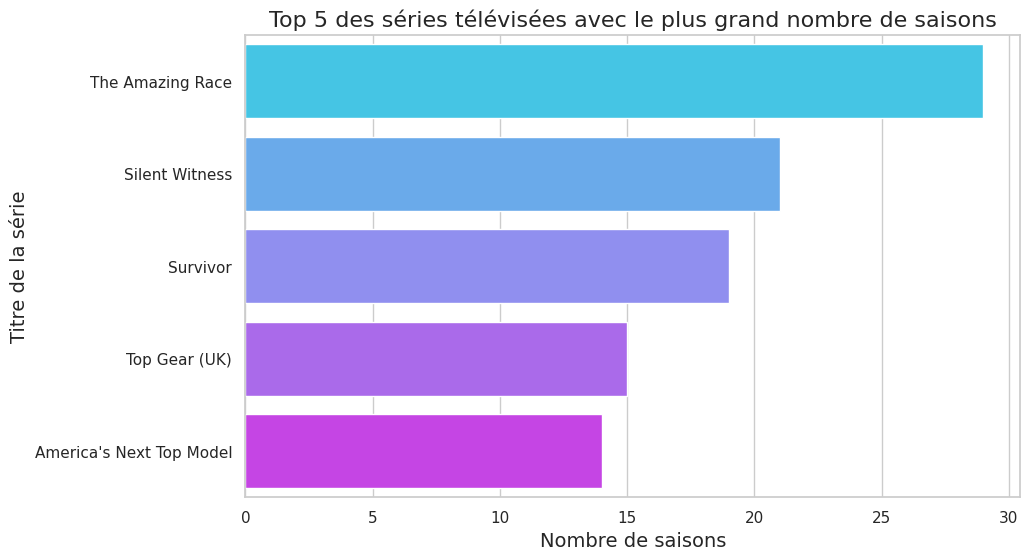

In [65]:

tv_shows = data[data['type'] == 'TV Show']

tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)

top_tv_shows = tv_shows.sort_values(by='num_seasons', ascending=False).head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons', fontsize=16)
plt.xlabel('Nombre de saisons', fontsize=14)
plt.ylabel('Titre de la série', fontsize=14)
plt.show()

Question 5: Identifier des contenus similaires
Cela peut être complexe sans connaître les colonnes exactes, mais une approche pourrait être d'utiliser des techniques de traitement de texte pour comparer des descriptions de contenu.

In [70]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Suppression des lignes avec des données manquantes dans la colonne 'description'
#data = data.dropna(subset=['description'])

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].dropna())

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data.index[data['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Exemple
print(get_recommendations('The Grand Seduction'))


5203             Mango Dreams
4319           Kadaram Kondan
1407             Oru Kai Osai
2638    Doctor Blood's Coffin
6793        The German Doctor
Name: title, dtype: object


Question 6: Analyse des tendances entre séries et films dans les derniers 10 annees

In [71]:
# print(data['release_year'])
data['release_year'] = data['release_year'].astype(int)
current_year = data['release_year'].max()
last_10_years = current_year - 10
data_last_10_years = data[data['release_year'] > last_10_years]
print(data_last_10_years)





     show_id     type                    title  \
0         s1    Movie      The Grand Seduction   
1         s2    Movie     Take Care Good Night   
2         s3    Movie     Secrets of Deception   
3         s4    Movie       Pink: Staying True   
6         s7    Movie                Hired Gun   
...      ...      ...                      ...   
9657   s9658    Movie     A Place at the Table   
9660   s9661    Movie       The Man in the Hat   
9662   s9663    Movie                    River   
9664   s9665  TV Show            Planet Patrol   
9666   s9667  TV Show  Maradona: Blessed Dream   

                                 director  \
0                            Don McKellar   
1                            Girish Joshi   
2                             Josh Webber   
3                          Sonia Anderson   
6                             Fran Strine   
...                                   ...   
9657     Kristi Jacobson, Lori Silverbush   
9660  John-Paul Davidson, Stephen Warbe

(Qst Bonus ++ ) Representation graphique des tendances entre séries et films dan les derniers 10 annees

<Figure size 1400x800 with 0 Axes>

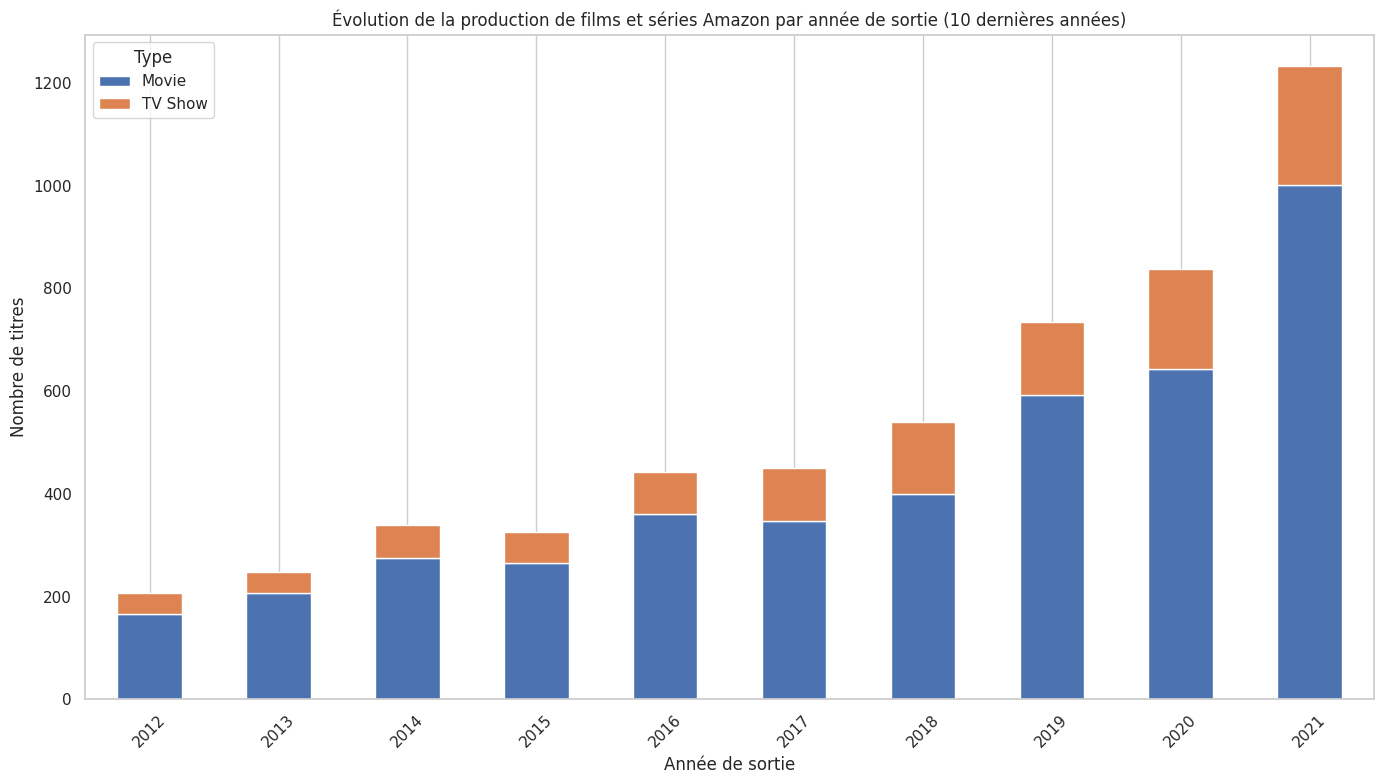

In [69]:
data['release_year'] = data['release_year'].astype(int)
current_year = data['release_year'].max()
last_10_years = current_year - 10
data_last_10_years = data[data['release_year'] > last_10_years]
type_counts = data_last_10_years.groupby(['release_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
type_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Évolution de la production de films et séries Amazon par année de sortie (10 dernières années)")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.legend(title="Type")
plt.grid(axis='y')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Question 7: Analyse des tendances entre séries et films dans tous les annees

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
data['release_and_type'] = data['release_year'].astype(str) + " - " + data['type']
print(data['release_and_type'])


0         2014 - Movie
1         2018 - Movie
2         2017 - Movie
3         2014 - Movie
4         1989 - Movie
             ...      
9663      1940 - Movie
9664    2018 - TV Show
9665      2008 - Movie
9666    2021 - TV Show
9667      2010 - Movie
Name: release_and_type, Length: 8435, dtype: object


(Qst Bonus ++ ) Representation graphique des tendances entre séries et films dans tous les annees

<Figure size 1400x800 with 0 Axes>

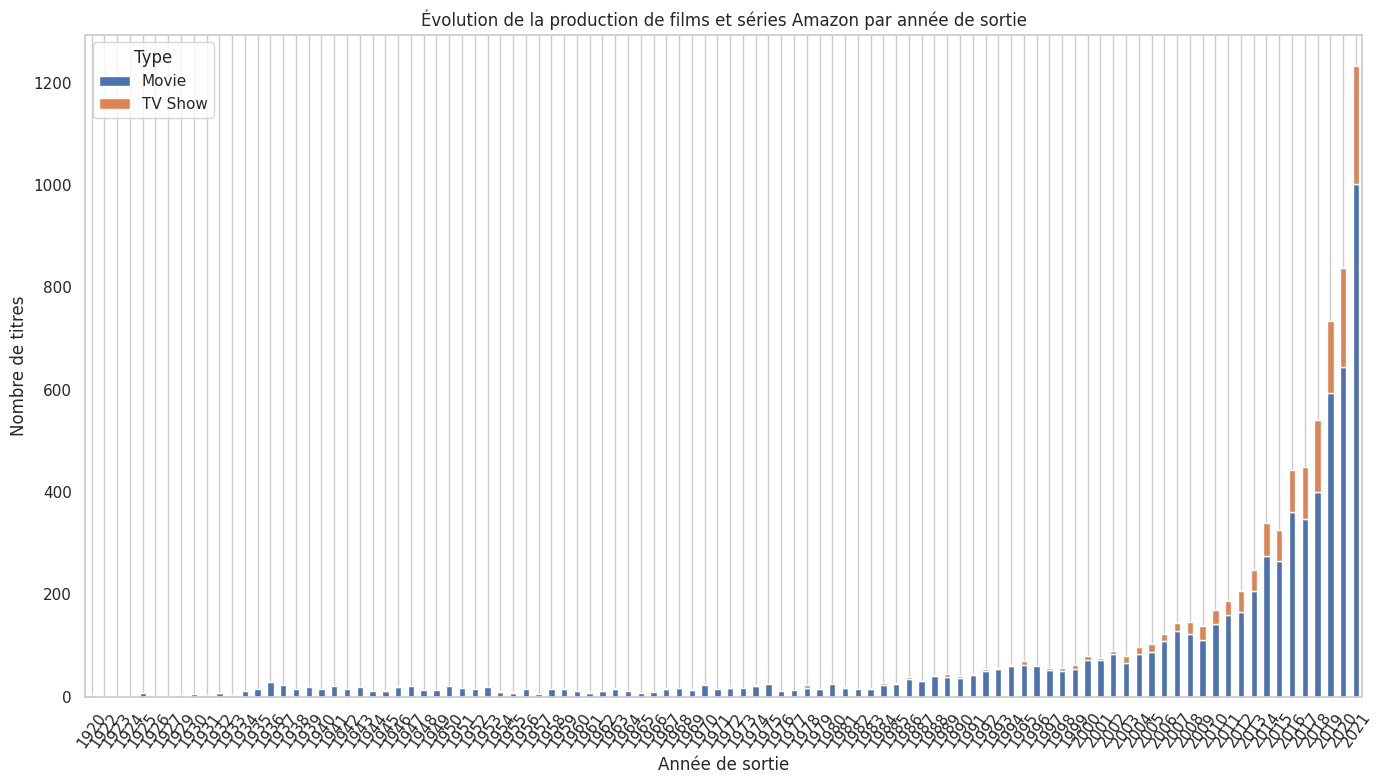

In [83]:
import matplotlib.pyplot as plt

data['release_year'] = data['release_year'].astype(int)
type_counts = data.groupby(['release_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
type_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Évolution de la production de films et séries Amazon par année de sortie")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.legend(title="Type")
plt.grid(axis='y')

plt.xticks(rotation=55)


plt.tight_layout()
plt.show()

